# MLP on MNIST

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal

Using TensorFlow backend.


This MNIST dataset contains 70,000 hand-written digits in 28*28 pixels image. It has 10 class labels from 0 to 9

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data() #loading the train and test data of mnist dataset
print("total number of data points in train data",len(x_train))
print("total number of data points in test data",len(x_test))

total number of data points in train data 60000
total number of data points in test data 10000


In [3]:
print(x_train.shape) 
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


we have 6000 image of 28*28 

In [0]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


now we convert 3-dimention(60000,28,28) matrix into 2-dimention(60000,784) matrix

## Data Normalization

here we normalize the data using
X => (X - Xmin)/(Xmax-Xmin) = X/256

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

# Building model

## 1. Two layers MNP with activation- ReLU and optimizer-Adam


### Case 1-using with only BatchNormalization

In [8]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization

model_1=Sequential()
model_1.add(Dense(128,input_dim=784,activation="relu",kernel_initializer='he_normal'))
model_1.add(BatchNormalization()) #batchNormalization 
model_1.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_1.add(Dense(10,activation='softmax'))
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history1=model_1.fit(x_train,y_train,epochs=30,verbose=1,batch_size=128,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.2731 - acc: 0.9195 - val_loss: 0.1487 - val_acc: 0.9536
Epoch 2/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.1021 - acc: 0.9695 - val_loss: 0.1081 - val_acc: 0.9676
Epoch 3/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.0693 - acc: 0.9792 - val_loss: 0.0957 - val_acc: 0.9694
Epoch 4/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.0506 - acc: 0.9843 - val_loss: 0.1031 - val_acc: 0.9668
Epoch 5/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.0400 - acc: 0.9870 - val_loss: 0.1061 - val_acc: 0.9679
Epoch 6/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.0313 - acc: 0.9902 - val_loss: 0.0868 - val_acc: 0.9759
Epoch 7/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.0263 - acc: 0.9916 - val_loss: 0.0928 - val_acc

10000/10000 [==============================] - 0s 29us/step
Test error: 0.1016737612550397
Test accuracy: 0.9793


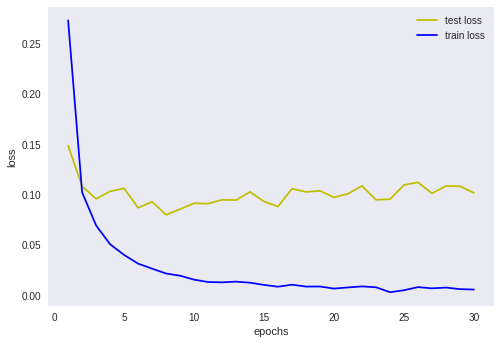

In [9]:
import matplotlib.pyplot as plt

score = model_1.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

x=list(range(1,31))

vl1=history1.history['val_loss']
l1=history1.history['loss']
plt.plot(x,vl1,color='y',label='test loss')
plt.plot(x,l1,color='b',label='train loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')


plt.grid()
plt.show()

### case 2-with Dropout only

In [10]:
from keras.layers import Dropout
model_2=Sequential()
model_2.add(Dense(128,input_dim=784,activation="relu",kernel_initializer='he_normal'))
model_2.add(Dropout(0.5))
model_2.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_2.add(Dense(10,activation='softmax'))
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history2=model_2.fit(x_train,y_train,epochs=30,verbose=1,batch_size=128,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.5139 - acc: 0.8447 - val_loss: 0.1883 - val_acc: 0.9442
Epoch 2/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.2482 - acc: 0.9263 - val_loss: 0.1432 - val_acc: 0.9566
Epoch 3/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.2018 - acc: 0.9400 - val_loss: 0.1164 - val_acc: 0.9636
Epoch 4/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.1783 - acc: 0.9462 - val_loss: 0.1091 - val_acc: 0.9685
Epoch 5/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.1597 - acc: 0.9504 - val_loss: 0.1028 - val_acc: 0.9696
Epoch 6/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.1477 - acc: 0.9549 - val_loss: 0.0915 - val_acc: 0.9729
Epoch 7/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.1385 - acc: 0.9567 - val_loss: 0.0853 - val_acc

10000/10000 [==============================] - 0s 26us/step
test error 0.07725040358993283
test accuracy 0.9788


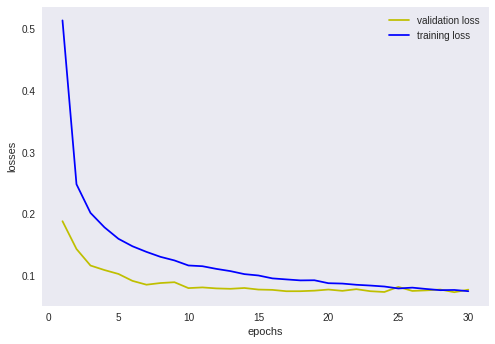

In [11]:
score=model_2.evaluate(x_test,y_test,verbose=1)
print("test error",score[0])
print("test accuracy",score[1])

x=list(range(1,31))
vl2=history2.history['val_loss']
l2=history2.history['loss']
plt.plot(x,vl2,'y',label='validation loss')
plt.plot(x,l2,'b',label='training loss')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("losses")
plt.grid()
plt.show()

### case 3- with both Dropout and BatchNormalization

In [12]:
model_3=Sequential()
model_3.add(Dense(128,input_dim=784,activation='relu',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_3.add(Dropout(0.5))
model_3.add(Dense(10,activation='softmax'))
model_3.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history3=model_3.fit(x_train,y_train,epochs=30,batch_size=128,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.8147 - acc: 0.7492 - val_loss: 0.2388 - val_acc: 0.9277
Epoch 2/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.4049 - acc: 0.8805 - val_loss: 0.1842 - val_acc: 0.9441
Epoch 3/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3288 - acc: 0.9053 - val_loss: 0.1606 - val_acc: 0.9517
Epoch 4/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.2892 - acc: 0.9182 - val_loss: 0.1385 - val_acc: 0.9578
Epoch 5/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.2645 - acc: 0.9236 - val_loss: 0.1298 - val_acc: 0.9605
Epoch 6/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.2414 - acc: 0.9320 - val_loss: 0.1162 - val_acc: 0.9644
Epoch 7/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.2298 - acc: 0.9351 - val_loss: 0.1161 - val_acc

10000/10000 [==============================] - 0s 31us/step
Test error: 0.09424658504130203
Test accuracy: 0.974


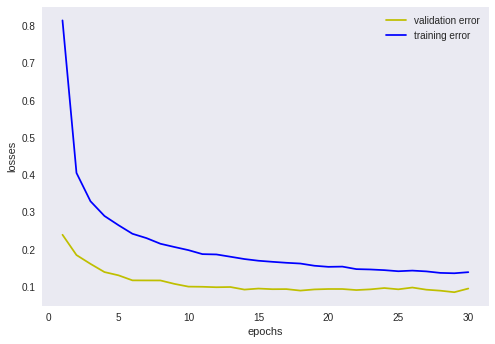

In [13]:
score = model_3.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])


x=list(range(1,31))
vl3=history3.history['val_loss']
l3=history3.history['loss']
plt.plot(x,vl3,'y',label='validation error')
plt.plot(x,l3,'b',label='training error')
plt.legend()
plt.grid()
plt.xlabel('epochs')
plt.ylabel('losses')
plt.show()

### case 4- without Dropout and BatchNormalization

In [14]:
model_4=Sequential()
model_4.add(Dense(128,input_dim=784,activation='relu',kernel_initializer='he_normal'))
model_4.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_4.add(Dropout(0.5))
model_4.add(Dense(10,activation='softmax'))
model_4.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history4=model_4.fit(x_train,y_train,epochs=50,batch_size=128,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.5135 - acc: 0.8470 - val_loss: 0.1695 - val_acc: 0.9464
Epoch 2/50
60000/60000 [==============================] - 2s 42us/step - loss: 0.2138 - acc: 0.9395 - val_loss: 0.1285 - val_acc: 0.9594
Epoch 3/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1542 - acc: 0.9567 - val_loss: 0.1014 - val_acc: 0.9687
Epoch 4/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1237 - acc: 0.9651 - val_loss: 0.0929 - val_acc: 0.9720
Epoch 5/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1018 - acc: 0.9710 - val_loss: 0.0852 - val_acc: 0.9754
Epoch 6/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.0895 - acc: 0.9745 - val_loss: 0.0796 - val_acc: 0.9757
Epoch 7/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.0782 - acc: 0.9773 - val_loss: 0.0783 - val_acc

10000/10000 [==============================] - 0s 27us/step
test error 0.13143735942197668
test accuracy 0.9802


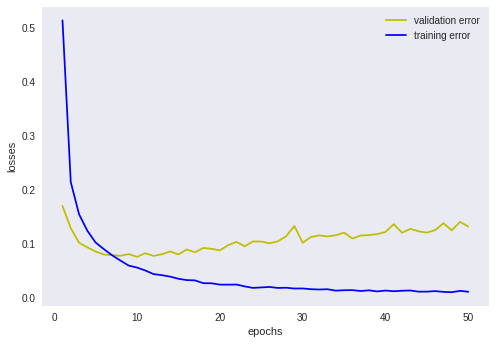

In [15]:
score=model_4.evaluate(x_test,y_test)
print("test error",score[0])
print("test accuracy",score[1])

x1=list(range(1,51))
vl4=history4.history['val_loss']
l4=history4.history['loss']
plt.plot(x1,vl4,'y',label='validation error')
plt.plot(x1,l4,'b',label='training error')
plt.legend()
plt.grid()
plt.xlabel('epochs')
plt.ylabel('losses')
plt.show()

## 2. Three layers MNP with activation- ReLU and optimizer-Adam

### case 1-with only BatchNormalization

In [16]:
model_5=Sequential()
model_5.add(Dense(128,input_dim=784,activation='relu',kernel_initializer='he_normal'))
model_5.add(BatchNormalization())
model_5.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_5.add(BatchNormalization())
model_5.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_5.add(Dense(10,activation='softmax'))
model_5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history5=model_5.fit(x_train,y_train,epochs=30,batch_size=128,verbose=1,validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.3039 - acc: 0.9120 - val_loss: 0.1472 - val_acc: 0.9565
Epoch 2/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.1079 - acc: 0.9666 - val_loss: 0.1103 - val_acc: 0.9647
Epoch 3/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.0733 - acc: 0.9767 - val_loss: 0.0928 - val_acc: 0.9708
Epoch 4/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.0541 - acc: 0.9835 - val_loss: 0.0935 - val_acc: 0.9717
Epoch 5/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.0429 - acc: 0.9860 - val_loss: 0.0941 - val_acc: 0.9727
Epoch 6/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.0366 - acc: 0.9885 - val_loss: 0.0974 - val_acc: 0.9715
Epoch 7/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.0288 - acc: 0.9906 - val_loss: 0.0961 - val_acc

test error 0.10749240423332085
test accuracy 0.9781


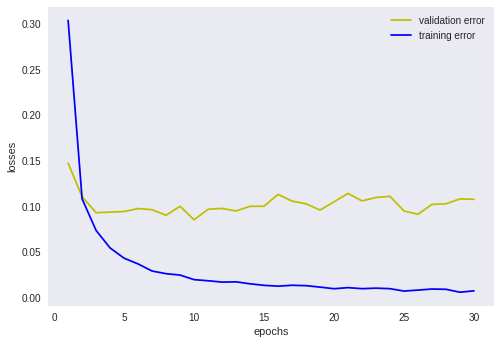

In [17]:
score=model_5.evaluate(x_test,y_test,verbose=0)
print('test error',score[0])
print('test accuracy',score[1])

x=list(range(1,31))
vl5=history5.history['val_loss']
l5=history5.history['loss']
plt.plot(x,vl5,'y',label='validation error')
plt.plot(x,l5,'b',label='training error')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('losses')
plt.grid()
plt.show()

### case 2-with Dropout

In [18]:
model_6=Sequential()
model_6.add(Dense(128,input_dim=784,activation='relu',kernel_initializer='he_normal'))
model_6.add(Dropout(0.5))
model_6.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_6.add(Dropout(0.5))
model_6.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_6.add(Dense(10,activation='softmax'))
model_6.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history6=model_6.fit(x_train,y_train,epochs=30,batch_size=128,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.8688 - acc: 0.7177 - val_loss: 0.2545 - val_acc: 0.9264
Epoch 2/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.3992 - acc: 0.8862 - val_loss: 0.1918 - val_acc: 0.9437
Epoch 3/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.3235 - acc: 0.9096 - val_loss: 0.1693 - val_acc: 0.9517
Epoch 4/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.2753 - acc: 0.9242 - val_loss: 0.1488 - val_acc: 0.9565
Epoch 5/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.2550 - acc: 0.9282 - val_loss: 0.1440 - val_acc: 0.9589
Epoch 6/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.2354 - acc: 0.9335 - val_loss: 0.1246 - val_acc: 0.9639
Epoch 7/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.2180 - acc: 0.9389 - val_loss: 0.1187 - val_acc

test error 0.09591007846567082
test accuracy 0.9741


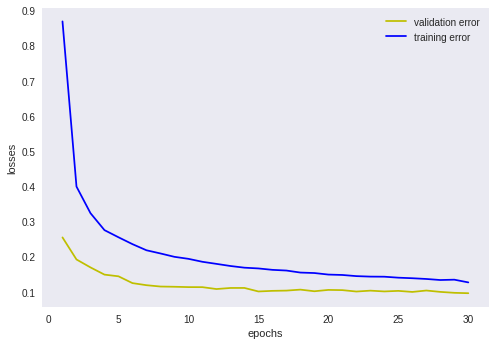

In [19]:
score=model_6.evaluate(x_test,y_test,verbose=0)
print('test error',score[0])
print('test accuracy',score[1])

x=list(range(1,31))
vl6=history6.history['val_loss']
l6=history6.history['loss']
plt.plot(x,vl6,'y',label='validation error')
plt.plot(x,l6,'b',label='training error')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('losses')
plt.grid()
plt.show()

### case 3-with both Dropout and BatchNormalization

In [20]:
model_7=Sequential()
model_7.add(Dense(128,input_dim=784,activation='relu',kernel_initializer='he_normal'))
model_7.add(Dropout(0.5))
model_7.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.5))
model_7.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_7.add(Dense(10,activation='softmax'))
model_7.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history7=model_7.fit(x_train,y_train,epochs=30,batch_size=127,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.8978 - acc: 0.7159 - val_loss: 0.2460 - val_acc: 0.9272
Epoch 2/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.3989 - acc: 0.8838 - val_loss: 0.2064 - val_acc: 0.9396
Epoch 3/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.3165 - acc: 0.9104 - val_loss: 0.1678 - val_acc: 0.9512
Epoch 4/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.2739 - acc: 0.9217 - val_loss: 0.1440 - val_acc: 0.9579
Epoch 5/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.2443 - acc: 0.9308 - val_loss: 0.1357 - val_acc: 0.9625
Epoch 6/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.2240 - acc: 0.9355 - val_loss: 0.1267 - val_acc: 0.9629
Epoch 7/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.2067 - acc: 0.9419 - val_loss: 0.1202 - val_acc

test error 0.08784910060963594
test accuracy 0.9751


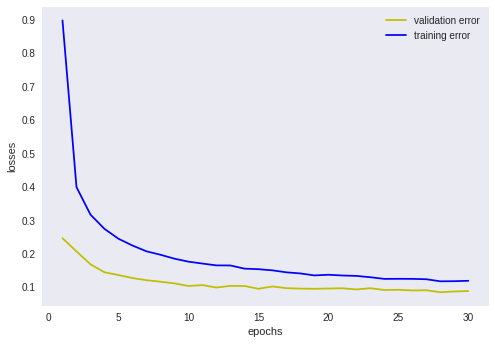

In [21]:
score=model_7.evaluate(x_test,y_test,verbose=0)
print("test error",score[0])
print("test accuracy",score[1])

x = list(range(1,31))
vl7=history7.history['val_loss']
l7=history7.history['loss']
plt.plot(x,vl7,'y',label='validation error')
plt.plot(x,l7,'b',label='training error')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('losses')
plt.grid()
plt.show()

### case 4-without Dropout and BatchNormalization

In [22]:
model_8=Sequential()
model_8.add(Dense(128,input_dim=784,activation='relu',kernel_initializer='he_normal'))
model_8.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_8.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_8.add(Dense(10,activation='softmax'))
model_8.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history8=model_8.fit(x_train,y_train,epochs=50,batch_size=128,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.3483 - acc: 0.8962 - val_loss: 0.1468 - val_acc: 0.9577
Epoch 2/50
60000/60000 [==============================] - 2s 42us/step - loss: 0.1301 - acc: 0.9610 - val_loss: 0.1308 - val_acc: 0.9605
Epoch 3/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.0914 - acc: 0.9724 - val_loss: 0.1100 - val_acc: 0.9692
Epoch 4/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0704 - acc: 0.9788 - val_loss: 0.0895 - val_acc: 0.9716
Epoch 5/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0552 - acc: 0.9829 - val_loss: 0.0933 - val_acc: 0.9703
Epoch 6/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.0441 - acc: 0.9863 - val_loss: 0.0885 - val_acc: 0.9724
Epoch 7/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.0358 - acc: 0.9889 - val_loss: 0.0843 - val_acc

test error 0.12899938047406814
test accuracy 0.9816


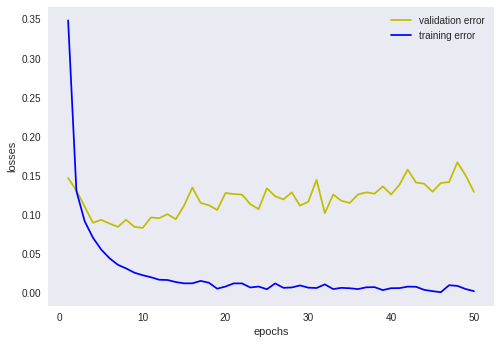

In [23]:
score=model_8.evaluate(x_test,y_test,verbose=0)
print('test error',score[0])
print('test accuracy',score[1])


x=list(range(1,51))
vl8=history8.history['val_loss']
l8=history8.history['loss']
plt.plot(x1,vl8,'y',label='validation error')
plt.plot(x1,l8,'b',label='training error')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('losses')
plt.grid()
plt.show()

## 3. Five layers MNPs with activation 'relu' and optimizer 'adam'

### case 1-with only BatchNormalization

In [24]:
model_9=Sequential()
model_9.add(Dense(512,input_dim=784,activation='relu',kernel_initializer='he_normal'))
model_9.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_9.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_9.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_9.add(BatchNormalization())
model_9.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_9.add(Dense(10,activation='softmax'))
model_9.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history9=model_9.fit(x_train,y_train,epochs=30,batch_size=128,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 158us/step - loss: 0.2523 - acc: 0.9286 - val_loss: 0.1468 - val_acc: 0.9559
Epoch 2/30
60000/60000 [==============================] - 8s 139us/step - loss: 0.0898 - acc: 0.9725 - val_loss: 0.1062 - val_acc: 0.9673
Epoch 3/30
60000/60000 [==============================] - 9s 143us/step - loss: 0.0610 - acc: 0.9810 - val_loss: 0.0877 - val_acc: 0.9715
Epoch 4/30
60000/60000 [==============================] - 9s 150us/step - loss: 0.0467 - acc: 0.9852 - val_loss: 0.0898 - val_acc: 0.9724
Epoch 5/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.0339 - acc: 0.9887 - val_loss: 0.0880 - val_acc: 0.9742
Epoch 6/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.0289 - acc: 0.9904 - val_loss: 0.0845 - val_acc: 0.9768
Epoch 7/30
60000/60000 [==============================] - 8s 134us/step - loss: 0.0245 - acc: 0.9922 - val_loss: 0.0809 - 

10000/10000 [==============================] - 1s 84us/step
test error 0.08685781101842004
test accuracy 0.9833


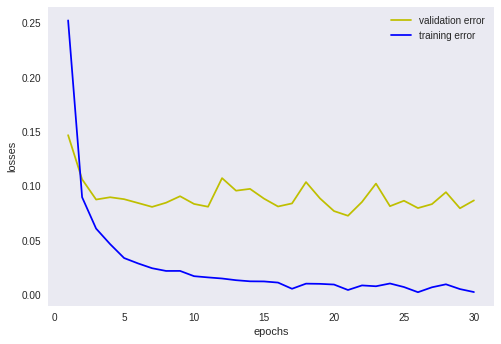

In [32]:
score=model_9.evaluate(x_test,y_test,verbose=1)
print('test error',score[0])
print('test accuracy',score[1])

x=list(range(1,31))
vl9=history9.history['val_loss']
l9=history9.history['loss']
plt.plot(x,vl9,'y',label='validation error')
plt.plot(x,l9,'b',label='training error')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('losses')
plt.grid()
plt.show()

### case 2-with Dropout only

In [26]:
model_10=Sequential()
model_10.add(Dense(512,input_dim=784,activation='relu',kernel_initializer='he_normal'))
model_10.add(Dropout(0.5))
model_10.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_10.add(Dropout(0.5))
model_10.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_10.add(Dropout(0.5))
model_10.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_10.add(Dropout(0.5))
model_10.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_10.add(Dense(10,activation='softmax'))
model_10.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history10=model_10.fit(x_train,y_train,epochs=30,batch_size=108,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 190us/step - loss: 1.0826 - acc: 0.6271 - val_loss: 0.2629 - val_acc: 0.9330
Epoch 2/30
60000/60000 [==============================] - 10s 166us/step - loss: 0.3844 - acc: 0.8969 - val_loss: 0.1667 - val_acc: 0.9544
Epoch 3/30
60000/60000 [==============================] - 10s 166us/step - loss: 0.2847 - acc: 0.9281 - val_loss: 0.1480 - val_acc: 0.9615
Epoch 4/30
60000/60000 [==============================] - 10s 163us/step - loss: 0.2460 - acc: 0.9408 - val_loss: 0.1246 - val_acc: 0.9679
Epoch 5/30
60000/60000 [==============================] - 10s 165us/step - loss: 0.2118 - acc: 0.9477 - val_loss: 0.1174 - val_acc: 0.9681
Epoch 6/30
60000/60000 [==============================] - 10s 169us/step - loss: 0.1911 - acc: 0.9535 - val_loss: 0.1217 - val_acc: 0.9701
Epoch 7/30
60000/60000 [==============================] - 10s 170us/step - loss: 0.1757 - acc: 0.9573 - val_loss: 0.

test error 0.0746986644620818
test accuracy 0.983


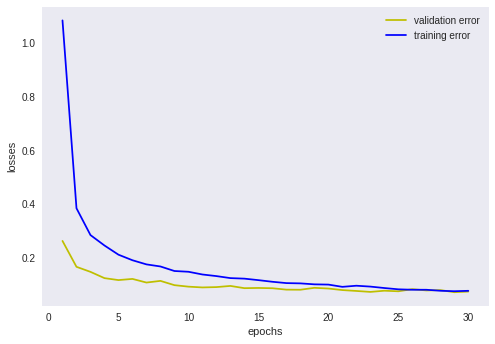

In [27]:
score=model_10.evaluate(x_test,y_test,verbose=0)
print('test error',score[0])
print('test accuracy',score[1])

vl10=history10.history['val_loss']
l10=history10.history['loss']
plt.plot(x,vl10,'y',label='validation error')
plt.plot(x,l10,'b',label='training error')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('losses')
plt.grid()
plt.show()

### case 3-with both Dropout and BatchNormalization

In [28]:
model_11=Sequential()
model_11.add(Dense(512,input_dim=784,activation='relu',kernel_initializer='he_normal'))
model_11.add(Dropout(0.5))
model_11.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_11.add(Dropout(0.5))
model_11.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_11.add(Dropout(0.5))
model_11.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_11.add(BatchNormalization())
model_11.add(Dropout(0.5))

model_11.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_11.add(Dense(10,activation='softmax'))
model_11.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history11=model_11.fit(x_train,y_train,epochs=30,batch_size=128,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 186us/step - loss: 1.2445 - acc: 0.5913 - val_loss: 0.2819 - val_acc: 0.9219
Epoch 2/30
60000/60000 [==============================] - 10s 160us/step - loss: 0.4142 - acc: 0.8829 - val_loss: 0.1760 - val_acc: 0.9506
Epoch 3/30
60000/60000 [==============================] - 10s 160us/step - loss: 0.2860 - acc: 0.9228 - val_loss: 0.1490 - val_acc: 0.9606
Epoch 4/30
60000/60000 [==============================] - 10s 160us/step - loss: 0.2373 - acc: 0.9393 - val_loss: 0.1280 - val_acc: 0.9651
Epoch 5/30
60000/60000 [==============================] - 10s 160us/step - loss: 0.2046 - acc: 0.9468 - val_loss: 0.1155 - val_acc: 0.9694
Epoch 6/30
60000/60000 [==============================] - 10s 160us/step - loss: 0.1781 - acc: 0.9542 - val_loss: 0.1014 - val_acc: 0.9735
Epoch 7/30
60000/60000 [==============================] - 9s 158us/step - loss: 0.1620 - acc: 0.9591 - val_loss: 0.1

test error 0.07691529653224861
test accuracy 0.9814


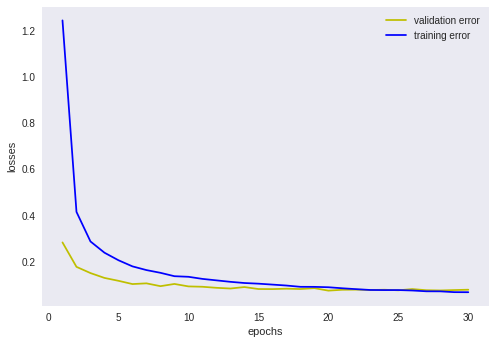

In [29]:
score=model_11.evaluate(x_test,y_test,verbose=0)
print('test error',score[0])
print('test accuracy',score[1])


x=list(range(1,31))
vl11=history11.history['val_loss']
l11=history11.history['loss']
plt.plot(x,vl11,'y',label='validation error')
plt.plot(x,l11,'b',label='training error')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('losses')
plt.grid()
plt.show()


### case 4-without Dropout and BatchNormalization


In [30]:
model_12=Sequential()
model_12.add(Dense(512,input_dim=784,activation='relu',kernel_initializer='he_normal'))
model_12.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_12.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_12.add(Dense(64,activation='relu',kernel_initializer='he_normal'))


model_12.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_12.add(Dense(10,activation='softmax'))
model_12.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history12=model_12.fit(x_train,y_train,epochs=50,batch_size=128,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 161us/step - loss: 0.2462 - acc: 0.9261 - val_loss: 0.1293 - val_acc: 0.9584
Epoch 2/50
60000/60000 [==============================] - 8s 139us/step - loss: 0.0880 - acc: 0.9728 - val_loss: 0.0848 - val_acc: 0.9760
Epoch 3/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.0609 - acc: 0.9805 - val_loss: 0.0846 - val_acc: 0.9726
Epoch 4/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.0449 - acc: 0.9857 - val_loss: 0.0952 - val_acc: 0.9730
Epoch 5/50
60000/60000 [==============================] - 8s 138us/step - loss: 0.0332 - acc: 0.9891 - val_loss: 0.0833 - val_acc: 0.9778
Epoch 6/50
60000/60000 [==============================] - 8s 136us/step - loss: 0.0326 - acc: 0.9897 - val_loss: 0.0902 - val_acc: 0.9739
Epoch 7/50
60000/60000 [==============================] - 8s 136us/step - loss: 0.0241 - acc: 0.9923 - val_loss: 0.0857 -

test error 0.0943650556378368
test accuracy 0.9851


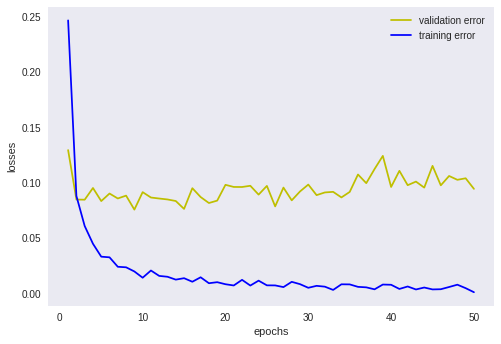

In [31]:
score=model_12.evaluate(x_test,y_test,verbose=0)
print('test error',score[0])
print('test accuracy',score[1])

x1=list(range(1,51))
vl12=history12.history['val_loss']
l12=history12.history['loss']
plt.plot(x1,vl12,'y',label='validation error')
plt.plot(x1,l12,'b',label='training error')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('losses')
plt.grid()
plt.show()

|2-layer|Test Error|Test Accuracy|
|-------|----------|-------------|
|Batch Normal|0.1016|0.9793|
|DropOut|0.7725|0.9788|
|with Batch-Normal & DropOut|0.0942|0.974|
|without Batch-Normal & DropOut|0.1314|0.9802|

|3-layer|Test Error|Test Accuracy|
|-|-|-|
|Batch Normal|0.1074|0.9781|
|DropOut|0.0959|0.9741|
|with Batch-Normal & DropOut|0.0878|0.9751|
|without Batch-Normal & DropOut|0.1289|0.9816|

|5-layer|Test Error|Test Accuracy|
|-|-|-|
|Batch Normal|0.0868|0.9833|
|DropOut|0.0746|0.983|
|with Batch-Normal & DropOut|0.0769|0.98114|
|without Batch-Normal & DropOut|0.0943|0.9851|

## Conclusion-
    1.As we increase number of layer it may increase accuracy.
    2.As we increase number of neurons in layer it may increase accuracy.
    3.without Dropout and BatchNormalization model goes overfit.
    4.with Dropout or BatchNormalization or both it give appox same accuracy.
    5.The model with five layers, activation-relu and optimizer-adam, with dropout and Batch normalization gives the best with accuracy 0.9814
